# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import uniform
import numpy as np
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from scipy.stats import norm
from scipy import stats
import scipy.stats as ss

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [195]:
#def create_sample(size,meane=50,stde=5):
#    data_normal = norm.rvs(size=size,loc=meane,scale=stde)
#    print(data_normal)
#    print(mean(data_normal))
#    print(std(data_normal))
#create_sample(10)

example1= np.random.normal(size=10,loc=50,scale=5)
example2= np.random.normal(size=50,loc=50,scale=5)
example3= np.random.normal(size=500,loc=50,scale=5)
example4= np.random.normal(size=5000,loc=50,scale=5)

print("example 1",stats.normaltest(example1))
print("example 2",stats.normaltest(example2))
print("example 3",stats.normaltest(example3))
print("example 4",stats.normaltest(example4))
alpha = 0.05
k2, p = stats.normaltest(example4)
if p < alpha:
    print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

def checkdistribution(example):
    alpha = 0.05
    k2, p = stats.normaltest(example)
    if p < alpha:
        print("The null hypothesis can be rejected")
    else:
         print("The null hypothesis cannot be rejected")
            
samples=[example1,example2,example3,example4] 

def distribution(samples):
    for i in samples:
        k2, p = stats.normaltest(i)
        alpha = 0.05
        print("p = {:g}".format(p))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print("The null hypothesis can be rejected")
        else:
            print("The null hypothesis cannot be rejected")
distribution(samples)

example 1 NormaltestResult(statistic=0.06648989825504091, pvalue=0.9673015908868415)
example 2 NormaltestResult(statistic=2.0616120689095867, pvalue=0.35671931659937606)
example 3 NormaltestResult(statistic=0.7822219301941534, pvalue=0.6763051056136795)
example 4 NormaltestResult(statistic=0.2864221639627858, pvalue=0.8665711320372627)
The null hypothesis cannot be rejected
p = 0.967302
The null hypothesis cannot be rejected
p = 0.356719
The null hypothesis cannot be rejected
p = 0.676305
The null hypothesis cannot be rejected
p = 0.866571
The null hypothesis cannot be rejected


#### Interpret the normaltest results and make your observations.

In [196]:
#La p para cada hipostesis es mayor que 0,5 por lo que la distribución es siempre normal

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

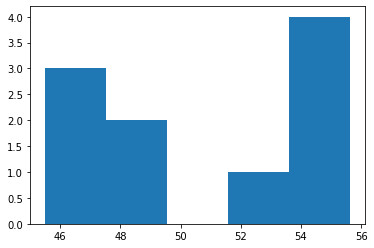

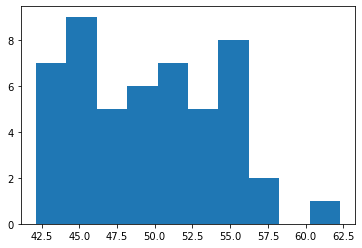

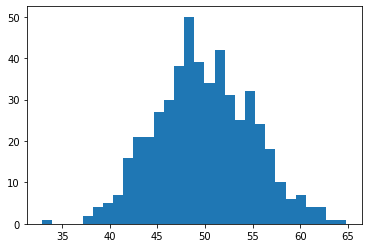

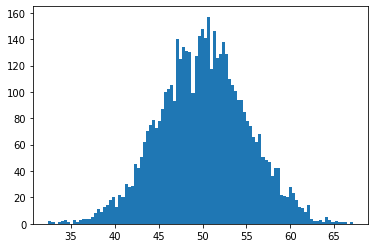

In [201]:
#example1= np.random.normal(size=10,loc=50,scale=5)
plt.hist(example1,bins=5)
plt.show()
plt.hist(example2,bins=10)
plt.show()
plt.hist(example3,bins=30)
plt.show()
plt.hist(example4,bins=100)
plt.show()


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
#Mientras la muestra es mayor, esta ordenada de mejor manera.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

0.3915046874999999


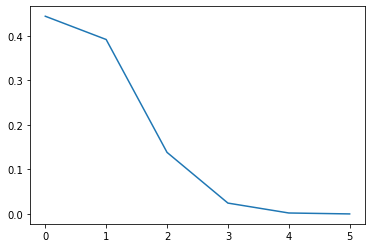

In [216]:
from scipy.stats import binom
x=range(6)
data_binom = binom.pmf(x,p=0.15,n=5)
plt.plot(data_binom)
print(binom.pmf(1,5,0.15))

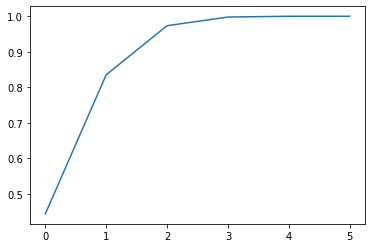

In [208]:
from scipy.stats import binom
x=range(6)
data_binom = binom.cdf(x,p=0.15,n=5)
plt.plot(data_binom)

#### Explain what you observe from the plot above

In [217]:
#La posibililidad de que al menos 1 persona clique en el anuncio es 0.39...

#### Now plot PMP with 50, 500, and 5000 visitors.

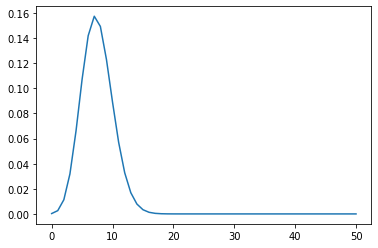

In [230]:
x = np.arange(0,51)
sns.lineplot(x, binom.pmf(x,p=0.15,n=50))

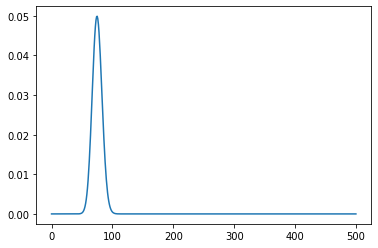

In [231]:
x = np.arange(0,501)
sns.lineplot(x, binom.pmf(x,p=0.15,n=500))

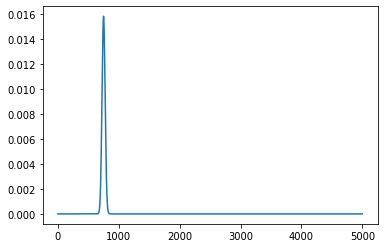

In [232]:
x = np.arange(0,5001)
sns.lineplot(x, binom.pmf(x,p=0.15,n=5001))

#### What did you notice from the distribution plots? Comment your findings.

In [233]:
#No lo entiendo bien :( despues de tu explicación felipe, he entendido más o menos que es pmf, pero cuando cambio las personas me sale esta grafica que es totalmente diferente.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [236]:
#teniendo una muestra, Poisson nos dice la probabilidad de que ocurra un suceso x número de veces.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [242]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
ss.poisson.pmf(300, 320)

0.01216063471394124

#### What is the probability of getting 60 visits?

In [244]:
ss.poisson.pmf(300, 60)

7.97816763099837e-108

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

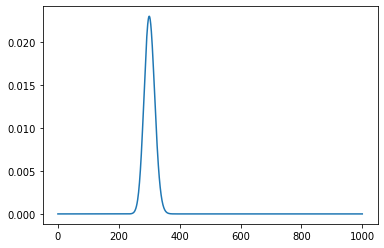

In [248]:
visits = range(1001)

probability_1001 = poisson.pmf(300, visits)

plt.plot(prob)